# **Exercise 5: Inventory & Capacity Planning**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part I: Hyatt's Problem (Overbooking level optimization)
---
**Dataset:** none needed (building simulation)

The Hyatt hotel has a combination of 100 King/Queen rooms available for reserving on a given night and is interested in mitigating the effect of no-shows on its profits by allowing overbooking. Overbooking occurs when the hotel accepts Y more customer reservations than its current capacity (i.e., (100 + Y) reservations for a given night).  

Hyatt offers a r=`$`150 fare that is fully refundable. The demand for rooms is abundant and generally exceeds capacity. The forecast for the number of customers that do not show up (X) is normally distributed with a mean=8 and standard deviation=2. The potential costs of denying a room to the customer with a confirmed reservation or not filling a vacant room are `$`175 in penalties. The penalties operate differently, where (i) the `$`25 meal voucher is a penalty of having to deny a customer a reservation because capacity has been reached and (ii) the `$`150 penalty occurs as an opportunity cost of not fulfilling an open room that was available.   

**Main Objective:** Determine how many rooms (Y) should be overbooked (sold in excess of capacity) by Hyatt, based on the Y that maximizes expected profit.

**Summarizing Details:**
- Capacity: 100 rooms
- Room price: $150
- Demand forecast for no-shows: normal with mean 8, standard deviation 2

In [ ]:
## Specify the input parameters
# X: number of customers who do not show up ~ N(8, 2)
# Y: number of rooms to be overbooked
capacity = 100
room_price = 150
denial_penalty = 25
empty_room_penalty = 150
noshow_mean = 8
noshow_std = 2

<Axes: ylabel='Frequency'>

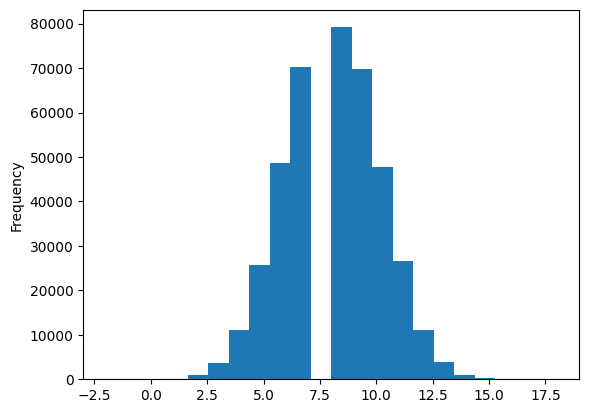

In [ ]:
## Simulate the number of no-shows (use 400,000 simulation runs)
# Simulaion-specific parameter
simulation_run = 400000

np.random.seed(12345)
df_noshows = pd.DataFrame({'no_shows':np.random.normal(noshow_mean, noshow_std, simulation_run).round()})
df_noshows['no_shows'].plot.hist(bins=22)

In [ ]:
## Develop an algorithm that tests different overbooking levels and computes the average expected profit
# As a rule of thumb, try overbooking levels between (mean - 3SD), (mean + 3SD)
df_optimize = pd.DataFrame({'overbook_level' : np.arange(noshow_mean - 3*noshow_std, noshow_mean + 3*noshow_std + 1)})

# Useing a loop to try different overbooking levels and computing average profit
for i in np.arange(0, df_optimize.shape[0]):
    df_noshows['full_hotel_revenue'] = capacity * room_price
    df_noshows['overbook_level'] = df_optimize.overbook_level[i]
    df_noshows['denial_penalty'] = np.maximum(df_noshows.overbook_level - df_noshows.no_shows, 0) * denial_penalty
    df_noshows['empty_room_penalty'] = np.minimum(df_noshows.overbook_level - df_noshows.no_shows, 0) * empty_room_penalty
    df_noshows['profit'] = df_noshows.full_hotel_revenue - (df_noshows.denial_penalty - df_noshows.empty_room_penalty)
    df_optimize.loc[i,'avg_profit'] = df_noshows.profit.mean()
    df_optimize.loc[i,'sd_profit'] = df_noshows.profit.std()

# Checking Optimal Overbooking Level
df_optimize.sort_values('avg_profit', ascending=False)

,overbook_level,avg_profit,sd_profit
8,10,14921.494375,76.247337
9,11,14915.148938,55.706880
7,9,14906.968437,116.268324
10,12,14897.200125,50.244790
11,13,14874.380188,50.053146
6,8,14861.941750,168.088117
12,14,14849.896000,50.346101
5,7,14782.279062,219.403680
4,6,14671.841313,259.502400
3,5,14540.140187,284.280067


### Conclusion: Part I
---
**Recommended overbooking level and profit estimates based on the results are:**
- **Overbooking Level:** 10
- **Expected Average Profit:** `$`14921.49
- **Uncertainty in Profit:** `$`76.24

**Interpretation:**
- The chosen overbooking level of 10 is justified based on maximizing expected profit while considering the trade-off between revenue and penalties.
- By overbooking 10 rooms, the hotel can capture additional revenue from reservations that may not materialize due to no-shows, thus increasing overall profitability.
- The penalties for denying reservations or having empty rooms are factored into the profit calculation, ensuring a balanced approach that minimizes potential losses.

In conclusion, the recommended overbooking level of 10 rooms provides a strategic balance between maximizing revenue and managing the risks associated with uncertain demand, ultimately leading to improved profitability for Hyatt.


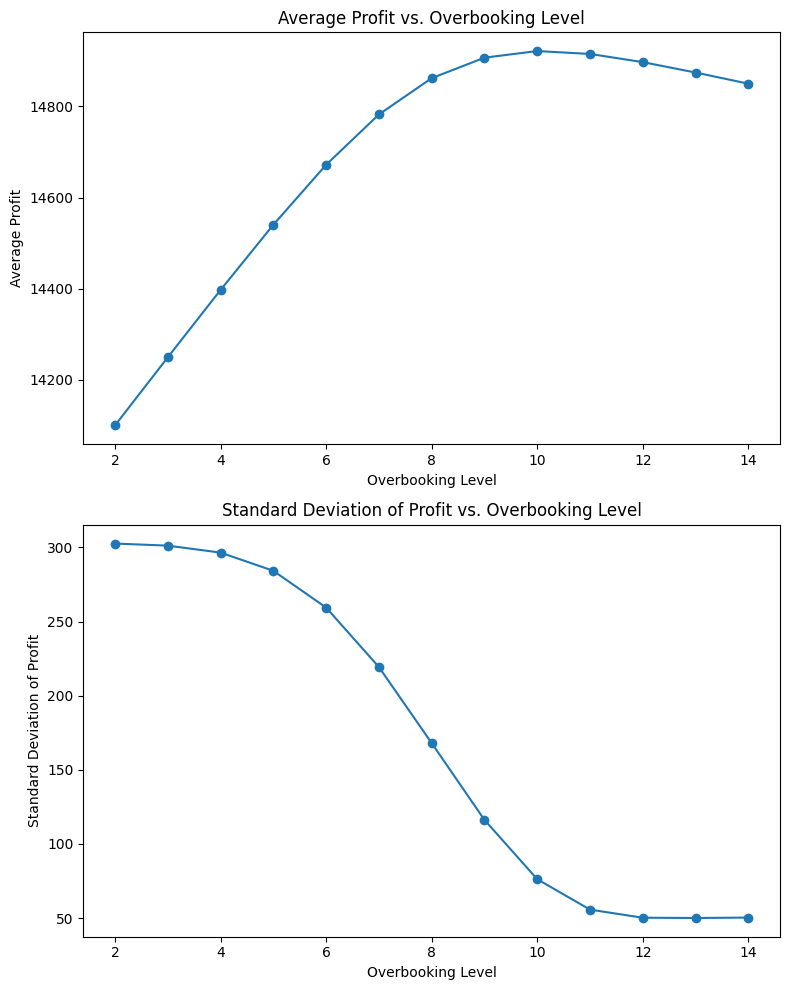

In [ ]:
## Plot the relationship between Avg Profit v/s overbooking level and STD of Profit v/s overbooking level
# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot 1
df_optimize.plot(x='overbook_level', y='avg_profit', ax=ax[0], title='Average Profit vs. Overbooking Level', marker='o', legend=False)
ax[0].set_xlabel('Overbooking Level')
ax[0].set_ylabel('Average Profit')

# Plot 2
df_optimize.plot(x='overbook_level', y='sd_profit', ax=ax[1], title='Standard Deviation of Profit vs. Overbooking Level', marker='o', legend=False)
ax[1].set_xlabel('Overbooking Level')
ax[1].set_ylabel('Standard Deviation of Profit')

plt.tight_layout()
plt.show();

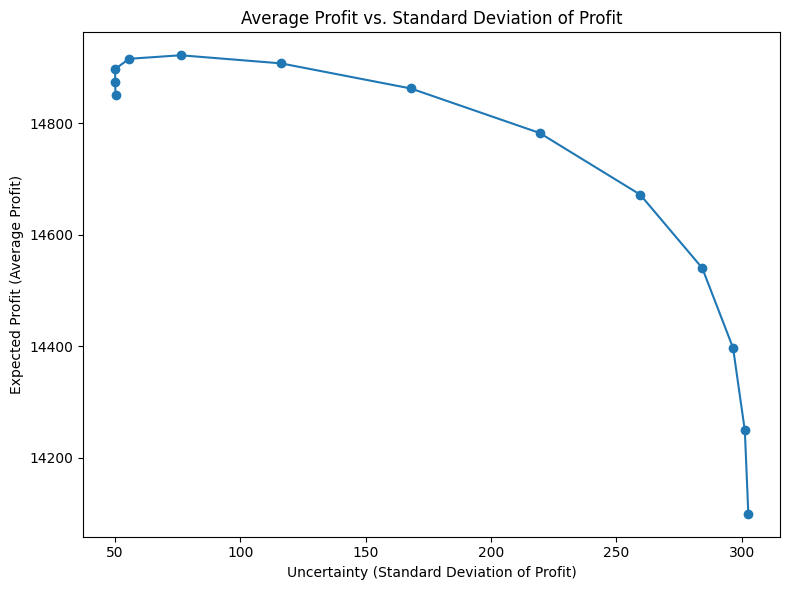

In [ ]:
## Plot the profit risk in terms of the efficiency frontier (avg profit vs. sd profit)
# Plotting the result
plt.figure(figsize=(8, 6))

# Plot
plt.plot(df_optimize['sd_profit'], df_optimize['avg_profit'], marker='o')
plt.title('Average Profit vs. Standard Deviation of Profit')
plt.xlabel('Uncertainty (Standard Deviation of Profit)')
plt.ylabel('Expected Profit (Average Profit)')
plt.tight_layout()
plt.show();

## Part II: The Parka Problem (Inventory level optimization)
---
**Dataset:** none needed (building simulation)

L.L. Bean is planning the order size for winter parkas, for the upcoming selling season. Each parka costs the company c=`$`70 and sells for p=`$`140 Any unsold parkas at the end of the season are disposed off by a sale/markdown at v=`$`40. Using historical data and a feel for the market, L.L. Bean forecasts the winter season demand to be normally distributed with a mean=26 and standard deviation=3.

**Main Objective:** Determine how many parkas (Q) should L.L. Bean purchase from its supplier, based on the Q that maximizes expected profit.

**Summarizing Details:**
- Procurement cost = `$`70  
- New item price = `$`140
- Markdown price = `$`40
- Demand forecast for parkas: normal with mean 26, standard deviation 3

In [ ]:
## Specify the input parameters
# Q: demand foreast of parkas ~ N(26, 3)
procurement_cost = 70
new_item_price = 140
markdown_price = 40
demand_parkas_mean = 26
demand_parkas_std = 3

<Axes: ylabel='Frequency'>

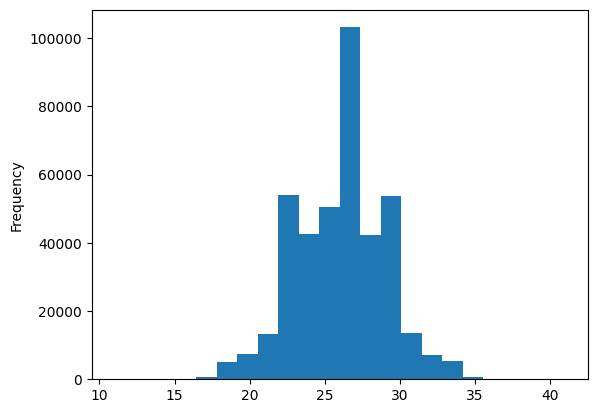

In [ ]:
## Simulate the number of no-shows (use 400,000 simulation runs)
# Simulaion-specific parameter
simulation_run = 400000

np.random.seed(12345)
df_demand = pd.DataFrame({'demand':np.random.normal(demand_parkas_mean, demand_parkas_std, simulation_run).round()})
df_demand['demand'].plot.hist(bins=22)

In [ ]:
## Develop an algorithm that tests different order size levels and computes the average expected profit
# As a rule of thumb, try order size levels between (mean - 3SD), (mean + 3SD)
df_optimize_2 = pd.DataFrame({'order_level':np.arange(demand_parkas_mean - 3*demand_parkas_std, demand_parkas_mean + 3*demand_parkas_std + 1)})

# Useing a loop to try different overbooking levels and computing average profit
for i in np.arange(0, df_optimize_2.shape[0]):
    df_demand['order_level'] = df_optimize_2.order_level[i]
    df_demand['rev_original_demand'] = np.minimum(df_demand.order_level, df_demand.demand) * new_item_price
    df_demand['rev_leftover_demand'] = np.maximum(df_demand.order_level - df_demand.demand, 0) * markdown_price
    df_demand['profit'] = df_demand.rev_original_demand + df_demand.rev_leftover_demand - (70 * df_demand.order_level)
    df_optimize_2.loc[i,'avg_profit'] = df_demand.profit.mean()
    df_optimize_2.loc[i,'sd_profit'] = df_demand.profit.std()

# Checking Optimal Order Level
df_optimize_2.sort_values('avg_profit', ascending=False)

,order_level,avg_profit,sd_profit
11,28,1715.16425,238.302376
10,27,1714.40525,209.418166
12,29,1705.38175,261.344576
9,26,1701.08550,176.345880
13,30,1687.60250,278.042974
8,25,1674.53600,141.795046
14,31,1664.36575,288.992714
15,32,1637.71600,295.344886
7,24,1635.35400,108.611068
16,33,1609.26975,298.752682


### Conclusion: Part II
---
**Recommended order size and profit estimates based on the results are:**
- **Order Level:** 28
- **Expected Average Profit:** `$`1715.16
- **Uncertainty in Profit:** `$`238.30

**Interpretation:**
- The chosen order size of 28 parkas is justified based on maximizing expected profit while considering the trade-off between procurement costs and potential revenue.
- By ordering 28 parkas, L.L. Bean can meet customer demand while minimizing the risk of excess inventory. Any unsold parkas can be sold at a markdown price, mitigating potential losses.
- The algorithm accounts for both forms of revenue (original price and markdown price) and subtracts the procurement costs, providing a comprehensive approach to profit optimization.

In conclusion, the recommended order size of 28 parkas provides a strategic balance between meeting customer demand and managing inventory costs, ultimately leading to improved profitability for L.L. Bean during the winter selling season.

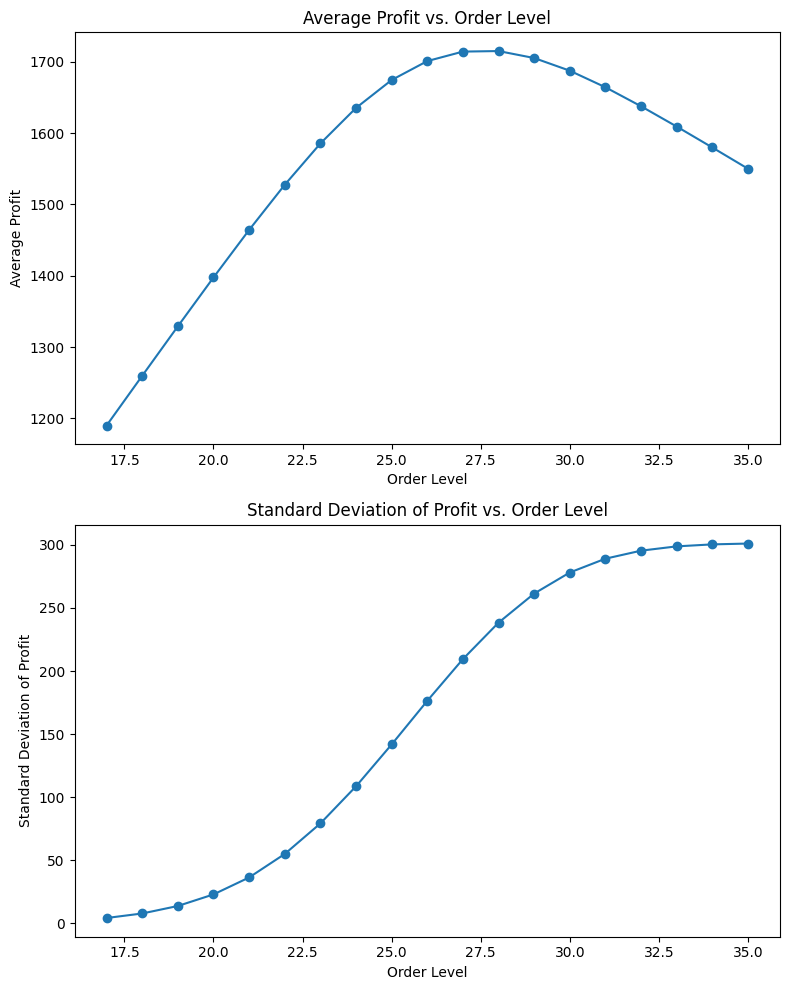

In [ ]:
## Plot the relationship between avg profit vs. order level and sd of profit vs. order level
# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot 1
df_optimize_2.plot(x='order_level', y='avg_profit', ax=ax[0], title='Average Profit vs. Order Level', marker='o', legend=False)
ax[0].set_xlabel('Order Level')
ax[0].set_ylabel('Average Profit')

# Plot 2
df_optimize_2.plot(x='order_level', y='sd_profit', ax=ax[1], title='Standard Deviation of Profit vs. Order Level', marker='o', legend=False)
ax[1].set_xlabel('Order Level')
ax[1].set_ylabel('Standard Deviation of Profit')

plt.tight_layout()
plt.show();

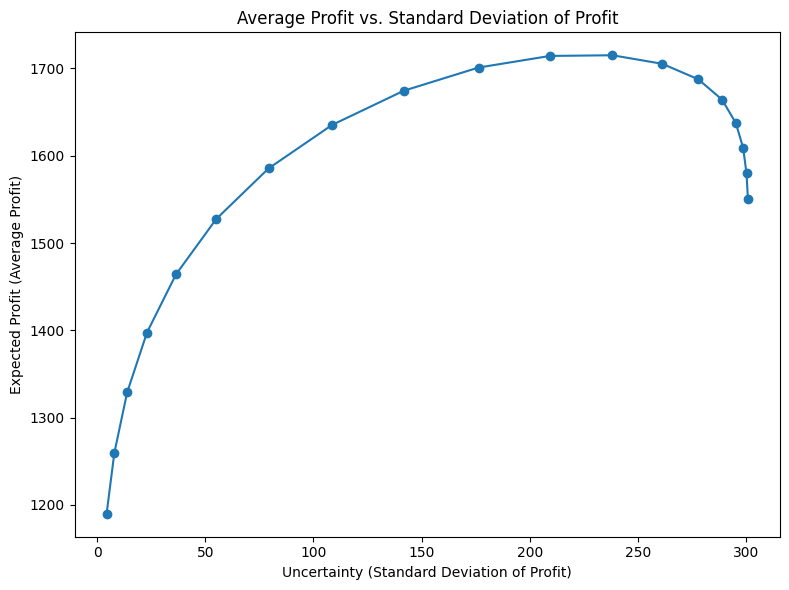

In [ ]:
## Plot the profit risk in terms of the efficiency frontier (avg profit vs. sd profit)
# Plotting the result
plt.figure(figsize=(8, 6))

# Plot
plt.plot(df_optimize_2['sd_profit'], df_optimize_2['avg_profit'], marker='o')
plt.title('Average Profit vs. Standard Deviation of Profit')
plt.xlabel('Uncertainty (Standard Deviation of Profit)')
plt.ylabel('Expected Profit (Average Profit)')
plt.tight_layout()
plt.show();